In [1]:
%run ../../Environment/environment.ipynb

Notebook ausgeführt


In [9]:
import sys
print(sys.executable)

c:\Users\Niklas\Documents\DHBW\Studienarbeit\Git\Studienarbeit2\Studienarbeit\trading_env\Scripts\python.exe


In [10]:
!pip show optuna

Name: optuna
Version: 4.2.1
Summary: A hyperparameter optimization framework
Home-page: https://optuna.org/
Author: Takuya Akiba
Author-email: 
License: 
Location: C:\Users\Niklas\Documents\DHBW\Studienarbeit\Git\Studienarbeit\trading_env\Lib\site-packages
Requires: alembic, colorlog, numpy, packaging, PyYAML, sqlalchemy, tqdm
Required-by: 


In [11]:
!pip show numpy

Name: numpy
Version: 2.2.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provided
        with the distribution.

     * Neither the name of the NumPy Developers nor the names of any
        contributors may be used to endorse or promote products derived
        from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED

In [12]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from collections import Counter

c:\Users\Niklas\Documents\DHBW\Studienarbeit\Git\Studienarbeit2\Studienarbeit\trading_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
seed = 42
SEED  = seed % (2**32 - 1)
print(f"SEED: {SEED}")

SEED: 42


In [24]:
# -------------------------------
# CSV Datem einlesen
# -------------------------------
train_data = pd.read_csv("../../Transform_data/stand_data/2023-2018_stand_data.csv")
train_data.drop('datetime', axis=1, inplace=True)

test_data = pd.read_csv("../../Transform_data/stand_data/2025-2024_stand_data.csv")
test_data.drop('datetime', axis=1, inplace=True)

if(train_data is not None and test_data is not None):
    print("Daten erfolgreich eingelesen")

Daten erfolgreich eingelesen


In [25]:
# -------------------------------
# TradingEnv erstellen (bitte sicherstellen, dass TradingEnv importiert oder im gleichen Skript definiert ist)
# -------------------------------
env = TradingEnv(
    data=train_data,
    initial_cash=10_000,
    window_size=336,
    scaler_path="../../Transform_data/scaler.pkl",
    default_seed=SEED
)

if(env is not None):
    print("Environment created successfully")

Seed in the environment: 42
Environment created successfully


In [26]:
# -------------------------------
# DQN-Agenten initialisieren
# -------------------------------
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    seed=SEED,
    buffer_size=500_000  # set a smaller replay buffer size (50k transitions)
)

# -------------------------------
# Training
# -------------------------------
model.learn(
    total_timesteps=10000, 
    log_interval=1
)

# Speichere das trainierte Modell
model.save("dqn_trading_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Seed in the environment: 42


# Backtesting

In [27]:
# -------------------------------
# Testlauf: Den trainierten Agenten in einer Episode ausführen
# -------------------------------
training_env = env

obs, info = training_env.reset(seed=SEED)
done = False

# Liste der actionen
action_list = []

while not done:
    # Bestimme die Aktion (deterministisch)
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)  # oder: action = action.item()
    obs, reward, done, truncated, info = training_env.step(action)
    action_list.append(action)

# Hier wird der Zustand gerendert (z.B. als Plot). Du kannst den Render-Modus anpassen.
training_env.render(mode='human')
print(action_list)



Seed in the environment: 42


KeyboardInterrupt: 

# Print what the agent choose

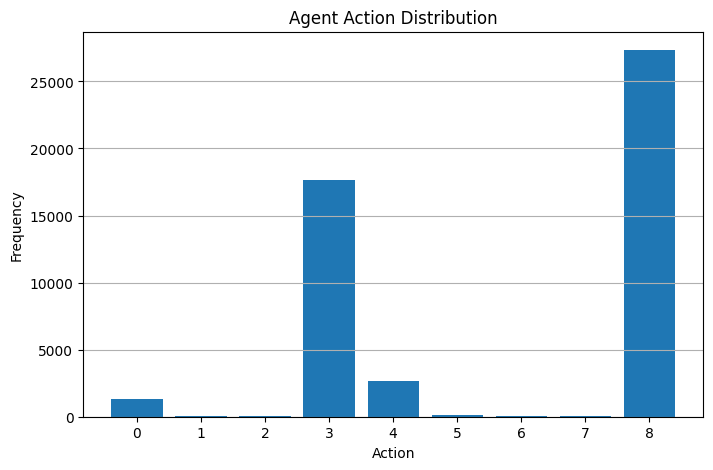

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each action
action_counts = Counter(action_list)

# Ensure all actions (0-8) are represented
actions = list(range(9))
counts = [action_counts.get(action, 0) for action in actions]

# Plot the action distribution
plt.figure(figsize=(8, 5))
plt.bar(actions, counts, tick_label=actions)
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Agent Action Distribution")
plt.grid(axis='y')

# Show the plot
plt.show()

Seed in the environment: 42
Seed in the environment: 42


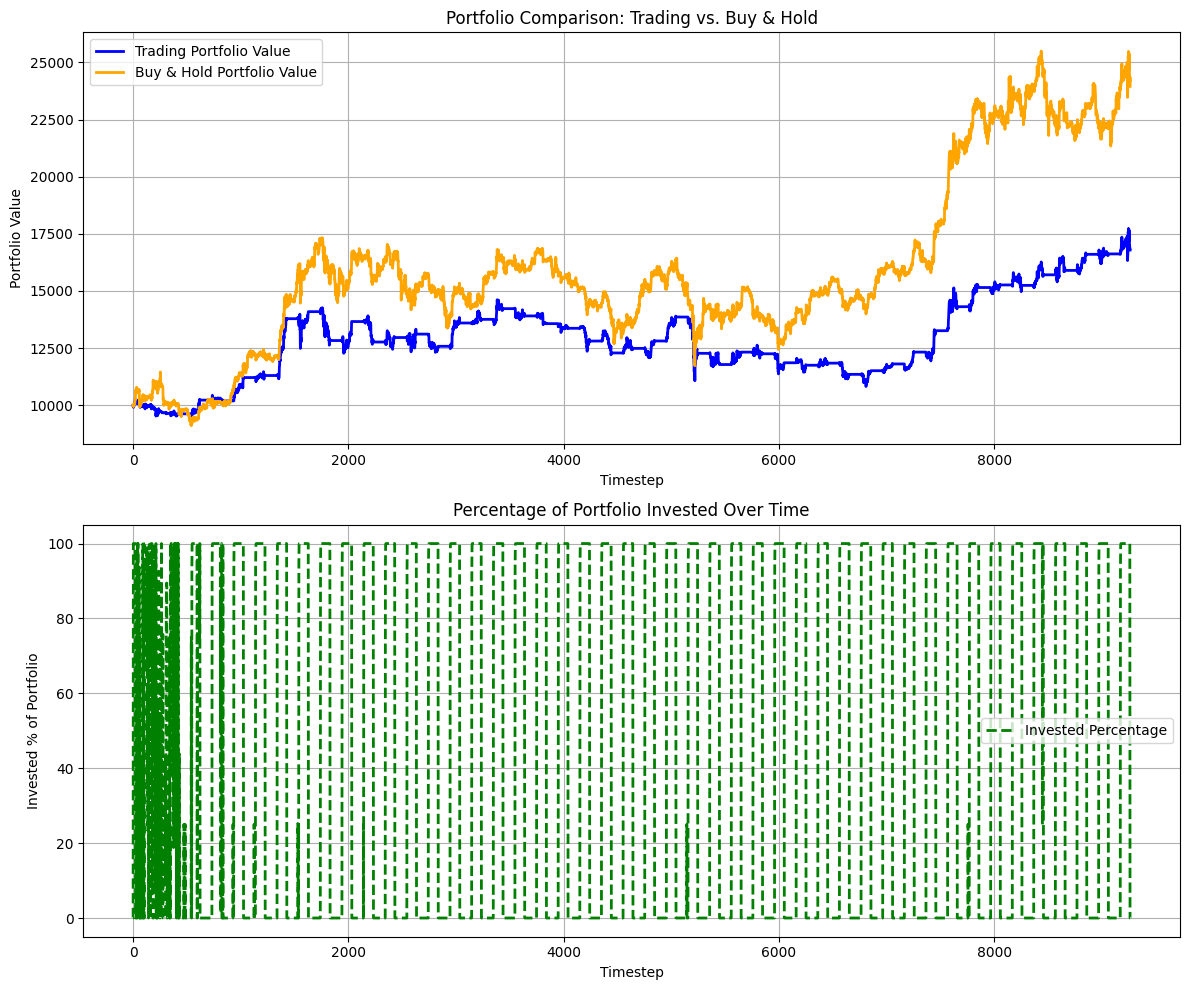

[0, 4, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 2, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 3, 3, 8, 8, 5, 5, 4, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 3, 3, 8, 8, 3, 5, 8, 8, 1, 1, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 2, 5, 3, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 3, 3, 5, 8, 2, 5, 2, 2, 3, 3, 3, 8, 3, 3, 5, 3, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 4, 3, 8, 6, 6, 8, 8, 8, 8, 6, 7, 3, 3, 3, 3, 1, 5, 2, 6, 3, 6, 2, 2, 5, 6, 6, 5, 5, 2, 5, 5, 4, 4, 5, 5, 8, 1, 0, 5, 1, 8, 8, 1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 8, 5, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 5, 8, 0, 0, 8, 8, 8, 5, 5, 8, 0, 1, 1, 7, 1, 1, 1, 2, 1, 1, 0, 0, 0, 8, 8, 0, 0, 1, 0, 0, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

In [ ]:
# -------------------------------
# Testlauf: Den trainierten Agenten in einer Episode ausführen
# -------------------------------
test_env = TradingEnv(
    data=test_data,
    initial_cash=10_000,
    window_size=336,
    scaler_path="../../Transform_data/scaler.pkl",
    default_seed=SEED
)

obs, info = test_env.reset(seed=SEED)
done = False

# Liste der actionen
action_list = []

while not done:
    # Bestimme die Aktion (deterministisch)
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)  # oder: action = action.item()
    obs, reward, done, truncated, info = test_env.step(action)
    action_list.append(action)

# Hier wird der Zustand gerendert (z.B. als Plot). Du kannst den Render-Modus anpassen.
test_env.render(mode='human')
print(action_list)